# 🌊 **Creating Latitude Bands for Spatial Analysis in Ocean Data**

## **Introduction**
In this notebook, we will generate **latitude bands** from the Equator to the North Pole using `geopandas` and `shapely`. These bands will help us analyze **mean chlorophyll values across latitudes over time** in the "[02_clip_ocean_by_latitude](02_clip_ocean_by_latitude.ipynb)" notebook. 

By the end of this tutorial, you will:
- Understand how to create **rectangular polygons** for latitude bands.
- Learn how to store these polygons in a **GeoDataFrame**.
- Save the output as a **GeoJSON** file for future use.

## 📑 Table of Contents

[🧰 1. Import Required Libraries](#1-import-required-libraries)  
[🌍 2. Define Latitude Bands](#2-define-latitude-bands)  
[🧱 3. Create Latitude Band Polygons](#3-create-latitude-band-polygons)  
[🗂️ 4. Create a Geospatial Dataset](#4-create-a-geospatial-dataset)  
[💾 5. Save as a GeoJSON File](#5-save-as-a-geojson-file)  
[🖼️ 6. Visualize the Latitude Bands](#6-visualize-the-latitude-bands)  
[🧭 7. Next Steps](#7-next-steps)


## 🧰 **1. Import Required Libraries**

In Python, a **library** is like a toolbox. It gives you access to ready-made tools and functions, so you don’t have to build everything from scratch.

In this project, we’ll use several types of libraries:

- **Geospatial libraries**  
  These help us work with geographic shapes like polygons and analyze spatial relationships. For example:  
  - `GeoPandas` lets us treat maps like tables.  
  - `Shapely` lets us create and manipulate geometric shapes.  
  - `geodatasets` gives us easy access to high-quality sample map layers like coastlines and land areas.

- **Plotting libraries**  
  These allow us to create visualizations of our data. We'll use:  
  - `matplotlib.pyplot` to draw maps and add labels.  
  - `matplotlib.ticker` to control how the latitude and longitude tick marks are shown (e.g., with degree symbols like `45°`).  
  - `seaborn` to create colorblind-friendly color palettes.  
  - `ListedColormap` from `matplotlib.colors` to use custom color lists in our plots.

- **Logging and system utilities**  
  Instead of using `print()`, we’ll use a library called `loguru` to:  
  - Show clear status messages as each step runs.  
  - Display color-coded messages like 🎉 success or 🚩 errors, which help with debugging and tracking progress.  
  - Keep our output clean, especially in notebooks.

In [1]:
# --- Geospatial libraries ---
import geopandas as gpd  # Geographic data handling (GeoDataFrames)
from shapely.geometry import Polygon  # Basic geometry creation (e.g., polygons)
import geodatasets  # Built-in sample datasets (e.g., Natural Earth land)

# --- Plotting libraries ---
import matplotlib.pyplot as plt  # Plotting maps and figures
import matplotlib.ticker as mticker  # Customizing tick labels on axes
from matplotlib.colors import ListedColormap  # Create custom colormaps from a list of colors

# --- Logging and system utilities ---
from loguru import logger  # Simple, colorful logging
import sys  # For routing logger output

# Set up the logger to show clean messages (colored text, no background)
from helpers import configure_logger
configure_logger()

# Check that everything was imported successfully
logger.success("🎉 Libraries successfully imported.")


16:23:08 | SUCCESS | 🎉 Libraries successfully imported.


## 🌍 **2. Define Latitude Bands**
We will create **10-degree latitude bands** from the **Equator (0°) to the North Pole (90°)**. Each band represents a horizontal slice of the globe.

The longitude range is set to **-180° to 180°**, covering the entire globe.

In [2]:
try:
    # Define the range of latitude bands (Equator to North Pole)
    latitude_bands = [(lat, lat + 10) for lat in range(0, 90, 10)]  # From 0° to 90° in 10° steps

    # Define longitude extent (Global)
    lon_min, lon_max = -180, 180

    logger.success("🎉 Latitude bands and global longitude range defined.")
except Exception as e:
    logger.error(f"🚩 Failed to define latitude bands or longitude range: {e}")

16:23:09 | SUCCESS | 🎉 Latitude bands and global longitude range defined.


## 🧱 **3. Create Latitude Band Polygons**
Each latitude band is represented as a **rectangular polygon** spanning the full longitude range. These polygons are stored along with their corresponding latitude range labels.


In [3]:
try:
    # List to store polygons and attributes
    polygons = []
    labels = []

    # Generate polygons for each latitude band
    for lat_min, lat_max in latitude_bands:
        polygon = Polygon([
            (lon_min, lat_min), (lon_max, lat_min),
            (lon_max, lat_max), (lon_min, lat_max),
            (lon_min, lat_min)  # Closing the polygon
        ])
        polygons.append(polygon)
        labels.append(f"{lat_min}° to {lat_max}°")

    logger.success("🎉 Latitude band polygons created and labeled.")
except Exception as e:
    logger.error(f"🚩 Failed to create and label latitude band polygons: {e}")


16:23:10 | SUCCESS | 🎉 Latitude band polygons created and labeled.


## 🗂️ **4. Create a Geospatial Dataframe**
We store the polygons and their labels in a structured dataset using a geospatial format. This allows for efficient spatial queries and visualization.

The dataset includes:
- A **"Latitude_Range"** column labeling each band (e.g., `"0° to 10°"`, `"10° to 20°"`, etc.).
- A **geometry column** containing the corresponding polygons.
- The coordinate reference system (CRS) set to **EPSG:4326 (WGS84)**, the standard for geographic data.


In [4]:
try:
    # Create a single GeoDataFrame with all bands
    gdf = gpd.GeoDataFrame(
        {"Latitude_Range": labels},  # Attribute data
        geometry=polygons,           # Polygon shapes
        crs="EPSG:4326"              # Set coordinate system
    )
    logger.success("🎉 GeoDataFrame created with labeled latitude bands and EPSG:4326 CRS.")
except Exception as e:
    logger.error(f"🚩 Failed to create GeoDataFrame: {e}")

16:23:12 | SUCCESS | 🎉 GeoDataFrame created with labeled latitude bands and EPSG:4326 CRS.


## 💾 **5. Save as a GeoJSON File**
The final dataset is saved as a **GeoJSON** file, a widely used format for storing and sharing geospatial data. This file will be used in later analyses.


In [5]:
# Save as GeoJSON
geojson_name = "data/latitude_bands_global.geojson"

logger.info("💾 Saving GeoJSON file...")

try:
    gdf.to_file(geojson_name, driver="GeoJSON")
    logger.success(f"🎉 GeoJSON file '{geojson_name}' created successfully.")
except Exception as e:
    logger.error(f"🚩 Could not save GeoJSON: {e}")

16:23:13 | INFO | 💾 Saving GeoJSON file...
16:23:13 | SUCCESS | 🎉 GeoJSON file 'data/latitude_bands_global.geojson' created successfully.


## 🖼️ **6. Visualize the Latitude Bands**
We’ll now create a map to visually check that our latitude bands look correct.

### 🌍 **6.1 Load the Land Background**

We use `geodatasets` to access a simple landmass layer from Natural Earth. This helps give our latitude bands some geographic context.

In [6]:
try:
    # Load the landmass layer from geodatasets
    land = gpd.read_file(geodatasets.get_path("naturalearth.land"))
    logger.success("🎉 Natural Earth land layer loaded from geodatasets.")
except Exception as e:
    logger.error(f"🚩 Failed to load land layer from geodatasets: {e}")


16:23:15 | SUCCESS | 🎉 Natural Earth land layer loaded from geodatasets.


### **🗺️ 6.2 Show the Final Map**

We will now generate the final map using `matplotlib`, with the following layers and styling:

- A light gray Natural Earth land background to give context
- Latitude bands colored by the **Beaded Pastel color palette** from [Esri's color ramp suggestions](https://developers.arcgis.com/javascript/latest/visualization/symbols-color-ramps/esri-color-ramps/)

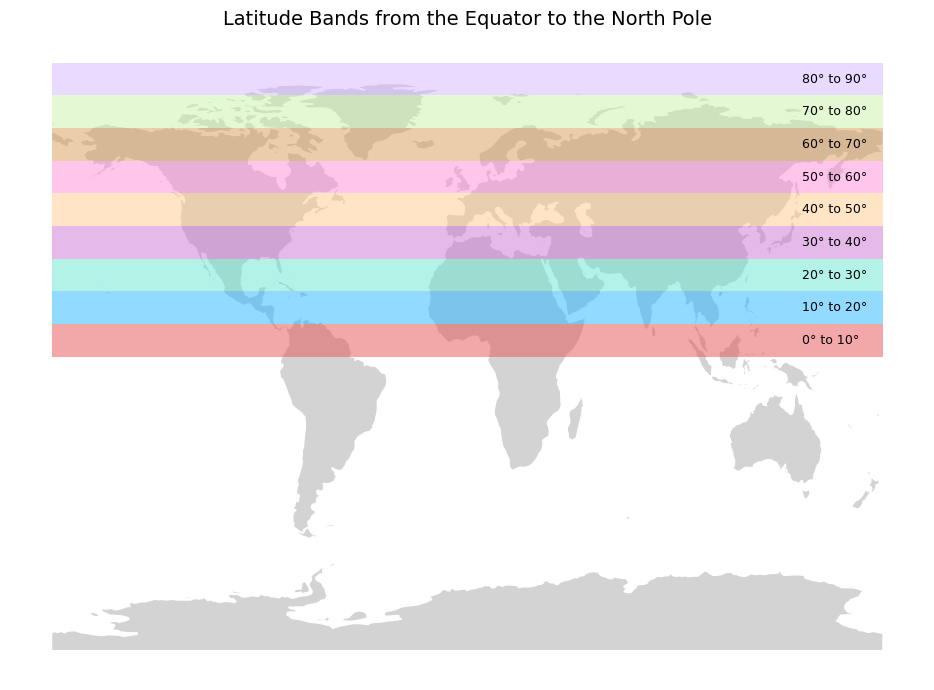

16:23:17 | SUCCESS | 🎉 Latitude bands plotted.


In [7]:
try:
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot land background
    land.plot(ax=ax, color="lightgray", edgecolor="white")

    # Configure color palette
    esri_beaded_pastel_colors = [
    "#e65154", "#26b6ff", "#67e6d1", "#cd76d6", "#ffca8c",
    "#ff8cd9", "#d99d5b", "#c8f2a9", "#d4b8ff"
    ]
    
    # Plot latitude bands with transparency
    gdf.plot(
        column="Latitude_Range",
        cmap=ListedColormap(esri_beaded_pastel_colors),
        edgecolor="none",
        alpha=0.5,
        linewidth=0.8,
        ax=ax,
        legend=False
    )

    # Add labels
    for idx, row in gdf.iterrows():
        minx, miny, maxx, maxy = row.geometry.bounds
        label_x = 145
        label_y = (miny + maxy) / 2

        ax.text(
            label_x, label_y,
            row["Latitude_Range"],
            ha="left",
            va="center",
            fontsize=9,
            color="black"
        )

    # Title
    ax.set_title("Latitude Bands from the Equator to the North Pole", fontsize=14)
    ax.set_axis_off()
    plt.tight_layout() 
    plt.show()

    logger.success("🎉 Latitude bands plotted.")
except Exception as e:
    logger.error(f"🚩 Failed to plot labeled latitude bands: {e}")


## **🧭 7. Next Steps**

You’ve now created a set of latitude bands that divide the globe by 10° blocks.

In the next notebook, we'll use these bands to:

- **Analyze the North Atlantic Ocean** by latitude zones (e.g., 30°N–40°N)
- **Extract, summarize, and visualize chlorophyll-a data** per band over time

This approach will help us decide what time period to create our Spring Bloom map animation for.

Continue to the next notebook:  
👉 [`02_zarr_by_latitude.ipynb`](02_zarr_by_latitude.ipynb)
